<div style="margin: 2em 5em 0 0;">
    
<p>
      <span style="margin-left: 17%; vertical-align: text-bottom;">&nbsp;&bullet;&nbsp; Business Analytics &nbsp;&bullet;&nbsp; Machine Learning - FMsBA3 &nbsp;&bullet;&nbsp; Hult International Business School</span>
</p>
<br>
<hr style="height: 1px; margin-top: -.2em">


<center>
   <br>
   <span style="font-size: 155%; font-weight: bold; font-family: "Times New Roman", Times, serif;">
      Unsupervised Analysis Project | Windows or Mac?
   </span>
   <br>
   <br>
   <div style="font-size: 107%; margin-top: .3em">
      <b>Instructor: Prof. Chase Kusterer</b>
      <br style="margin-bottom: .5em">
      <b>Team 11</b><br>
      Jacopo Casati
      <br>
      Ana Lucía Vicuña Iriarte
      <br>
      Ohyoung Kim 
      <br>
      Neil Marlowe
      <br>
      Arunkumar Yadava
   </div>
</center>
    
<br>
<br>

In [1]:
#INITIAL SETUP

# importing packages#########################################################
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
# new libraries
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.manifold      import TSNE           # t-SNE
from sklearn.preprocessing import StandardScaler        # standard scaler
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


# loading data and setting display options###################################
# loading data
survey_data = pd.read_excel(io="./datasets/survey_data.xlsx")

    
# checking the type of the dataset###########################################
#survey_data.head()


#Rename columns##############################################################
#remove spaces and apostrophes and put everything to lower letters
for col in survey_data.columns:
    str_col = col.replace(' ', '_').replace('\'', '').lower()
    survey_data.rename(columns={col: str_col}, inplace=True)

    
#definition of useful functions##############################################

# invert values
def invert_likit(source_column, target_column):
    for index, value in survey_data.iterrows():
        if survey_data.loc[index, source_column] == 1:
            survey_data.loc[index, target_column] = 5
        elif survey_data.loc[index, source_column] == 2:
            survey_data.loc[index, target_column] = 4
        elif survey_data.loc[index, source_column] == 4:
            survey_data.loc[index, target_column] = 2
        elif survey_data.loc[index, source_column] == 5:
            survey_data.loc[index, target_column] = 1
        else:
            survey_data.loc[index, target_column] = 3
            
            
# inertia
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


# scree_plot
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)


    # displaying the plot
    plt.show()

    

In [2]:
#DATA CLEANING AND MASSAGING

#removing contradictory results##############################################

#list of variables to reverse
mirror_vars = ['keep_in_the_background', 'leave_my_belongings_around',
               'am_relaxed_most_of_the_time', 
               'start_conversations', 
               'am_not_really_interested_in_others', 
               'like_order',
               'make_people_feel_at_ease',
               'am_not_interested_in_other_peoples_problems', 
               'am_exacting_in_my_work',
               'often_feel_blue', 
               'shirk_my_duties',
               'am_quiet_around_strangers',
               'dont_mind_being_the_center_of_attention']


#creation of reverted columns
for col in mirror_vars:
    invert_likit(col, col + '_inverted')


#reversion of the variable to compare
for index, value in survey_data.iterrows():
    if survey_data.loc[index, "what_is_your_age?"] < 15:
        survey_data.loc[index, "age"] = '0-14'
    elif survey_data.loc[index, "what_is_your_age?"] < 25:
        survey_data.loc[index, "age"] = '15-24'
    elif survey_data.loc[index, "what_is_your_age?"] < 65:
        survey_data.loc[index, "age"] = '25-64'
    else:
        survey_data.loc[index, "age"] = '65 and above'
        
#check how many contradictions there are for every observation
survey_data['contradiction_counter'] = 0
survey_data.loc[abs(survey_data['am_the_life_of_the_party'] - 
                    survey_data['keep_in_the_background_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['am_always_prepared'] -
                                      survey_data['leave_my_belongings_around_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['get_stressed_out_easily'] -
                                      survey_data['am_relaxed_most_of_the_time_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['dont_talk_a_lot'] -
                                      survey_data['start_conversations_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['am_interested_in_people'] -
                                      survey_data['am_not_really_interested_in_others_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['insult_people'] -
                                      survey_data['make_people_feel_at_ease_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['sympathize_with_others_feelings'] -
                                      survey_data['am_not_interested_in_other_peoples_problems_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['make_a_mess_of_things'] -
                                      survey_data['am_exacting_in_my_work_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['seldom_feel_blue'] -
                                      survey_data['often_feel_blue_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['get_chores_done_right_away'] -
                                      survey_data['shirk_my_duties_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[ abs(survey_data['often_forget_to_put_things_back_in_their_proper_place'] -
                                      survey_data['like_order_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['talk_to_a_lot_of_different_people_at_parties'] -
                                      survey_data['am_quiet_around_strangers_inverted']) > 2,
                    'contradiction_counter'] += 1
survey_data.loc[abs(survey_data['dont_like_to_draw_attention_to_myself'] -
                                      survey_data['dont_mind_being_the_center_of_attention_inverted']) > 2,
                    'contradiction_counter'] += 1


#survey_data['contradiction_counter'].sort_values().value_counts(sort = False )

#removing row with contradiction value >=  20
survey_data.drop(survey_data.loc[survey_data.contradiction_counter > 2 ].index, inplace=True)

#print(survey_data['contradiction_counter'].sort_values().value_counts(sort = False ))
#
##removing inverted columns
#print("before: ",len(survey_data.columns))
survey_data = survey_data[survey_data.columns.drop(list(survey_data.filter(regex='inverted')))]
#print("after: ",len(survey_data.columns))

#removing the column contradion value
survey_data = survey_data.drop(columns  = ['contradiction_counter'])



#feature engineering#########################################################

#creating new variables based on the main 5 personality traits
survey_data['Agreeableness'] 	= survey_data.iloc[:,[1,16,21,26,36,41]].mean(axis=1)
survey_data['Conscientiousness']= survey_data.iloc[:,[2,4,7,12,17,22,27,32,37,39,42,44,47]].mean(axis=1)
survey_data['Extraversion']	= survey_data.iloc[:,[0,5,6,10,15,20,25,30,31,35,40,45]].mean(axis=1)
survey_data['Neuroticism'] 	= survey_data.iloc[:,[3,8,11,13,18,23,28,33,38,43,46,48]].mean(axis=1)
survey_data['Openness'] = survey_data.iloc[:,[9,14,19,24,29,34,49,]].mean(axis=1)

#creating new variables based on hilt DNA
survey_data = survey_data.reset_index(drop=True)
survey_data['Thinking'] = survey_data.loc[:, ["see_underlying_patterns_in_complex_situations",
"dont__generate_ideas_that_are_new_and_different",
"demonstrate_an_awareness_of_personal_strengths_and_limitations",
"display_a_growth_mindset",
"take_initiative_even_when_circumstances,_objectives,_or_rules_arent_clear",
"translate_ideas_into_plans_that_are_organized_and_realistic"]].mean(axis=1)
survey_data['Team_building'] = survey_data.loc[:, ["respond_effectively_to_multiple_priorities","dont_persuasively_sell_a_vision_or_idea",
"build_cooperative_relationships","work_well_with_people_from_diverse_cultural_backgrounds",
"resolve_conflicts_constructively","coach_teammates_for_performance_and_growth","drive_for_results"
]].mean(axis=1)
survey_data['Communication'] = survey_data.loc[:, ["encourage_direct_and_open_discussions",
"respond_effectively_to_multiple_priorities","encourage_direct_and_open_discussions",
"listen_carefully_to_others","effectively_negotiate_interests,_resources,_and_roles",
"cant_rally_people_on_the_team_around_a_common_goal","seek_and_use_feedback_from_teammates"]].mean(axis=1)


#creation of needed datasets#################################################

#copy for safety reason
df_main = survey_data.copy()

#useful lists
list_no_pca = ['what_laptop_do_you_currently_have?',
       'what_laptop_would_you_buy_in_next_assuming_if_all_laptops_cost_the_same?',
       'what_program_are_you_in?', 'what_is_your_age?', 'gender',
       'what_is_your_nationality?_', 'what_is_your_ethnicity?', 'age']
list_char = ['Agreeableness','Conscientiousness','Extraversion','Neuroticism','Openness']            
list_hult_dna = ['see_underlying_patterns_in_complex_situations', 
                 'dont__generate_ideas_that_are_new_and_different', 
                 'demonstrate_an_awareness_of_personal_strengths_and_limitations', 
                 'display_a_growth_mindset', 'respond_effectively_to_multiple_priorities', 
                 'take_initiative_even_when_circumstances,_objectives,_or_rules_arent_clear', 
                 'encourage_direct_and_open_discussions', 'listen_carefully_to_others', 
                 'dont_persuasively_sell_a_vision_or_idea','build_cooperative_relationships', 
                 'work_well_with_people_from_diverse_cultural_backgrounds', 
                 'effectively_negotiate_interests,_resources,_and_roles', 
                 'cant_rally_people_on_the_team_around_a_common_goal', 
                 'translate_ideas_into_plans_that_are_organized_and_realistic', 
                 'resolve_conflicts_constructively', 'seek_and_use_feedback_from_teammates', 
                 'coach_teammates_for_performance_and_growth', 'drive_for_results']
list_duplicates = ['respond_effectively_to_multiple_priorities.1', 
                 'take_initiative_even_when_circumstances,_objectives,_or_rules_arent_clear.1', 
                 'encourage_direct_and_open_discussions.1']
#dataset for 5 personality traits pca
df_aggregated = df_main[['Agreeableness',
               'Conscientiousness','Extraversion','Neuroticism','Openness']]
#dataset for hult dna
df_hult = df_main[["Thinking", "Team_building", "Communication"]]


#data normalization##########################################################

#hult dna group
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
X_scaled_hult= scaler.fit_transform(df_hult)

# converting scaled data into a DataFrame
df_hult_scaled = pd.DataFrame(X_scaled_hult)

# reattaching column names
df_hult_scaled.columns = df_hult.columns

## checking pre- and post-scaling variance
#print(pd.np.var(df_hult), '\n\n')
#print(pd.np.var(df_hult_scaled))


#aggregated group
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
X_scaled_aggregated= scaler.fit_transform(df_aggregated)

# converting scaled data into a DataFrame
df_aggregated_scaled = pd.DataFrame(X_scaled_aggregated)

# reattaching column names
df_aggregated_scaled.columns = df_aggregated.columns

## checking pre- and post-scaling variance
#print(pd.np.var(df_aggregated), '\n\n')
#print(pd.np.var(df_aggregated_scaled))

<h1>Personality Traits definition</h1>

<li>Gentle Joe: They are organized and thinks about how their actions affect others. They are curious about their surroundings and tend to be eager to enjoy new experiences.
<li>Grumpy Introvert: They are introverted and has difficulty getting along with many people. They also tend not to consider what others think of themselves. 
<li>Happy Camper: They are good at dealing with stress and doesn't worry much. They are curious about their surroundings and tend to be eager to enjoy new experiences.
<li>Unhappy Camper: They tends to get angry easily and get stressed a lot. They don't care how others feel about themselves.
<li>Free Spirit: They hate structure and schedule. Therefore, they tend to fail to complete assigned tasks. However, they are creative.


In [3]:
#PCA

#5 personality traits########################################################

# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 5,
            random_state = 802)

# FITTING and TRANSFORMING the scaled data
main_pca = pca.fit_transform(df_aggregated_scaled)

## comparing dimensions of each DataFrame
#print("Original shape:", df_aggregated_scaled.shape)
#print("PCA shape     :",  main_pca.shape)

# component number counter
component_number = 0
tot = 0
# looping over each principal component
#for variance in pca.explained_variance_ratio_:
#    component_number += 1
#    
#    print(f"PC {component_number} : {variance.round(3)}")
#    tot += variance
#    print(tot)
#
## calling the scree_plot function
#scree_plot(pca_object = pca)

## setting plot size
#fig, ax = plt.subplots(figsize = (10, 10))
#
## developing a PC to feature heatmap
#sns.heatmap(pca.components_, 
#            cmap = 'coolwarm',
#            square = True,
#            annot = True,
#            linecolor = 'black')
#
#plt.xticks(range(0, 5),
#           df_aggregated_scaled.columns,
#           rotation=90)
#
## displaying the plot
#plt.show()

# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(df_aggregated_scaled.columns)

## checking the result
#print(factor_loadings_df)

## saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings2.xlsx')

factor_loadings_df.columns = ["gentle_joe",
                               "grumpy_introvert",
                               "happy_camper",
                               "unhappy_camper",
                               "free_spirit"]

# converting into a DataFrame 
main_pca = pd.DataFrame(main_pca)

# renaming columns
main_pca.columns = factor_loadings_df.columns


#hult dna####################################################################
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)

# FITTING and TRANSFORMING the scaled data
hult_pca = pca.fit_transform(df_hult_scaled)

## comparing dimensions of each DataFrame
#print("Original shape:", df_hult_scaled.shape)
#print("PCA shape     :",  hult_pca.shape)
#
## component number counter
#component_number = 0
#tot = 0
## looping over each principal component
#for variance in pca.explained_variance_ratio_:
#    component_number += 1
#    
#    print(f"PC {component_number} : {variance.round(3)}")
#    tot += variance
#    print(tot)
#
## calling the scree_plot function
#scree_plot(pca_object = pca)

## setting plot size
#fig, ax = plt.subplots(figsize = (10, 10))
#
## developing a PC to feature heatmap
#sns.heatmap(pca.components_, 
#            cmap = 'coolwarm',
#            square = True,
#            annot = True,
#            linecolor = 'black')
#
#plt.xticks(range(0, 3),
#           df_hult_scaled.columns,
#           rotation=90)
#
## displaying the plot
#plt.show()

# transposing pca components
factor_loadings_hult_df = pd.DataFrame(pd.np.transpose(pca.components_))

# naming rows as original features
factor_loadings_hult_df = factor_loadings_hult_df.set_index(df_hult_scaled.columns)

## checking the result
#print(factor_loadings_hult_df)

## saving to Excel
#factor_loadings_hult_df.to_excel('customer_factor_loadings2.xlsx')

factor_loadings_hult_df.columns = ["beginners",
                                  "thinkers",
                                  "team_builders"]

# converting into a DataFrame 
hult_pca = pd.DataFrame(hult_pca)

# renaming columns
hult_pca.columns = factor_loadings_hult_df.columns


#put things together
final_df = pd.concat([main_pca,hult_pca], axis= 1)

# scaling (normalizing) variables before correlation analysis

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with the data
X_scaled= scaler.fit_transform(final_df)

# converting scaled data into a DataFrame
final_df_scaled = pd.DataFrame(X_scaled)

# reattaching column names
final_df_scaled.columns = final_df.columns

## checking pre- and post-scaling variance
#print(pd.np.var(final_df), '\n\n')
#print(pd.np.var(final_df_scaled))

final_df_complete = pd.concat([final_df,survey_data[list_no_pca]], axis= 1)


<ipython-input-3-c213a03d3b85>:48: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))
<ipython-input-3-c213a03d3b85>:116: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_hult_df = pd.DataFrame(pd.np.transpose(pca.components_))


<h1>Cluster Definitions</h1>
<h3>Gentle Export:</h3>
The Gentle Expert cluster is defined as a cluster with:</br>
<ul>
<li>1.	Strong Gentle Joe persona</li>
<li>2.	Strong Beginner persona </li>
<li>3.	A slight Grumpy Introvert persona</li>
</ul>    
<h3>Introvert Beginner:</h3>
The Introvert Beginner cluster is defined as a cluster with:
<ul>
<li>1.	A slight Gentle Joe persona </li>
<li>2.	Somewhat of Grumpy Introvert persona</li>
<li>3.	Somewhat of a Beginner persona</li>
</ul>
<h3>Rude Expert:</h3>
The Rude Expert cluster is defined as a cluster with:
<ul>
<li>1.	Limited Gentle Joe tenders</li>
<li>2.	Slight low on the Happy Camper</li>
<li>3.	Definitely not a Beginner</li>
</ul>

<h3>Rude Beginner:</h3>
The Rude Beginner cluster is defined as a cluster with:
<ul>
<li>1.	No Gentle Joe tendencies</li>
<li>2.	Definitely a Beginner</li>
<li>3.	With very slight extrovert and Happy Camper tendencies</li>
</ul>

In [4]:
#CLUSTERING

cluster_list = ['gentle_joe','grumpy_introvert','happy_camper','unhappy_camper',
                'free_spirit','beginners','thinkers','team_builders']

# grouping data based on Ward distance
standard_mergings_ward = linkage(y = final_df,
                                 method = 'ward',
                                 optimal_ordering = True)
#
## setting plot size
#fig, ax = plt.subplots(figsize=(12, 12))
#
## developing a dendrogram
#dendrogram(Z = standard_mergings_ward,
#           leaf_rotation = 90,
#           leaf_font_size = 6)
#
## saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
#plt.show()

## calling the inertia_plot() function
#inertia_plot(data = pca_scaled)

# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)

# fitting the object to the data
customers_k_pca.fit(final_df)

# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})

## checking the results
#print(customers_kmeans_pca.iloc[: , 0].value_counts())

# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         final_df_complete],
                         axis = 1)


## checking results
#clst_pca_df

final_pca_clust_df = clst_pca_df

# renaming regions
cluster_names = {0 : 'gentle_expert',
                 1 : 'introvert_beginner',
                 2 : 'rude_expert',
                 3 : 'rude_beginner'
                }

final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)
# checking the results
data_df = final_pca_clust_df

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = [cluster_list] # Med, No Wine

## checking results (clusters = rows, pc = columns)
#centroids_pca_df.round(2)

# cluster_list
tech_list = ['what_laptop_do_you_currently_have?', 
             'what_laptop_would_you_buy_in_next_assuming_if_all_laptops_cost_the_same?']
demo_list = ['what_laptop_do_you_currently_have?', 
             'what_laptop_would_you_buy_in_next_assuming_if_all_laptops_cost_the_same?',
             'what_program_are_you_in?', 
             'age', 
             'gender', 
             'what_is_your_nationality?_', 
             'what_is_your_ethnicity?']



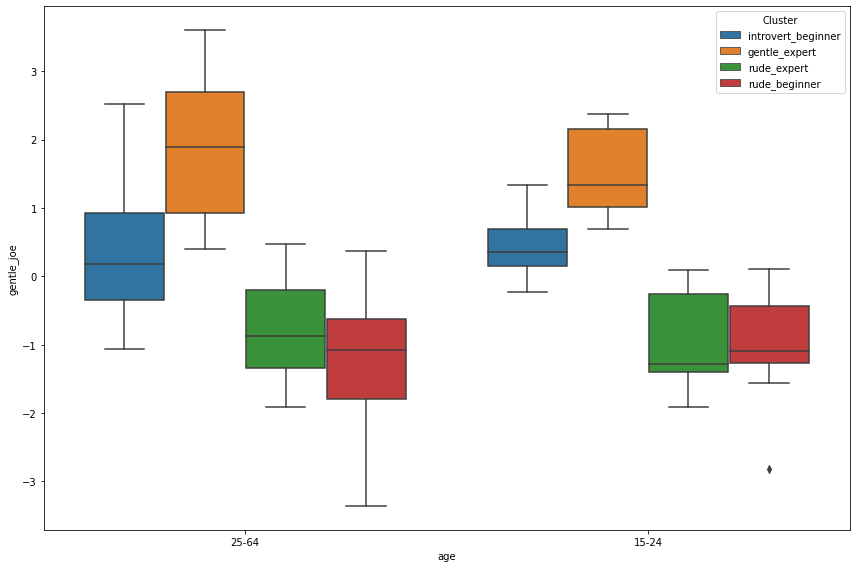

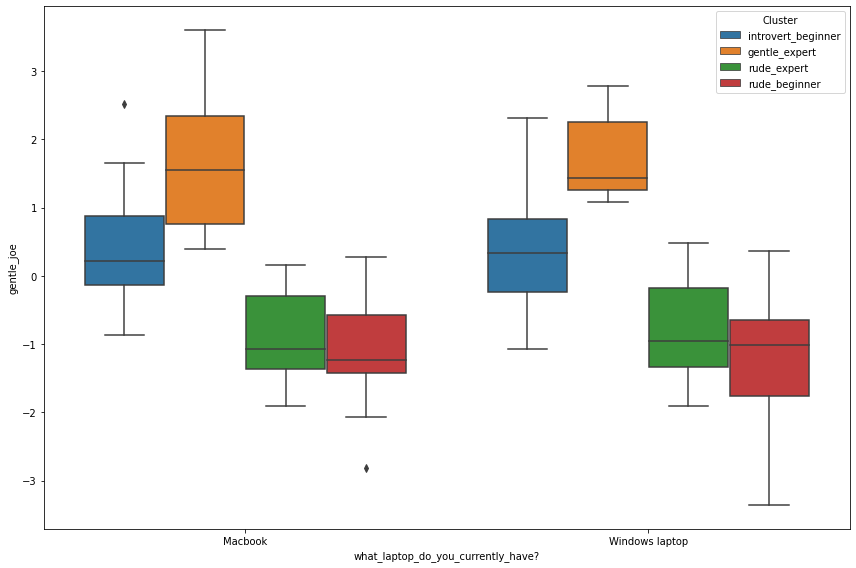

In [5]:
#Clustering Analysis
save_plots = False
show_plots = False

#Clustering Analysis
########################
# Age - gentle_joe
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age',
            y = 'gentle_joe',
            hue = 'Cluster',
            data = data_df)
# formatting and displaying the plot
plt.tight_layout()
filenamepath = './analysis_images/age - gentle_joe.png'
plt.savefig(filenamepath)
if show_plots:
    plt.show()

########################
# what_laptop_do_you_currently_have - gentle_joe
########################
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'what_laptop_do_you_currently_have?',
            y = 'gentle_joe',
            hue = 'Cluster',
            data = data_df)
# formatting and displaying the plot
plt.tight_layout()
filenamepath = './analysis_images/what_laptop_do_you_currently_have - gentle_joe.png'
plt.savefig(filenamepath)
if show_plots:
    plt.show()



if show_plots:
    for demo_elem in demo_list:
        for cluster_elem in cluster_list:
            fig, ax = plt.subplots(figsize = (12, 8))
            sns.boxplot(x = demo_elem,
                        y = cluster_elem,
                        hue = 'Cluster',
                        data = data_df)


            # formatting and displaying the plot
            plt.tight_layout()
            if save_plots:
                filenamepath = './analysis_images/' + demo_elem + ' - ' + cluster_elem + '.png'
                filenamepath = filenamepath.replace('?', '')
                plt.savefig(filenamepath)
            plt.show()        

<h1>Comparing Mac vs Windows users</h1>
<p>
According to OSXDaily (2011), Mac users have a clear differentiation with Windows users regarding demographic, personality, and behaviors. Mac users tend to be younger generation who prefer to live in cities rather than suburban or rural areas. They have a more liberal mindset and want to be perceived as unique with a particular style. As opposite, Windows users are more conservative with a casual style, who want to fit with others. 
In addition, Mac users are stronger in verbal skills rather than math skills. They are creative with interest in modern art and design. Finally, Mac users tend to be more tech savvy and they like to be early adopters with new technologies.
<p>
<h2>Conclusions</h2>    
<p>
According to our clustering analysis, external research, Kendra Cherry’s article about the big five dimensions of personality and the Hult DNA, we can state the following. Mac users are stronger in “Openness”, “Extraversion”, “Embracing change”, and “Communication skills”. This is reflected by some characteristics in their behavior. They are more creative, open to trying new things, and happy to think about abstract concepts. Also, they are characterized by sociability, talkativeness, and emotional expressiveness. Finally, they like feeling special and unique. 
On the other hand, Windows users are stronger in “Conscientiousness”, “Agreeableness”, and “Team Building”. Some characteristics in their behavior are high levels of thoughtfulness, good impulse control, and goal-directed behaviors. They tend to be organized and mindful of details, planning ahead to fulfill deadlines and be productive. Also, they think about others and have some prosocial behaviors, such as trust, altruism, kindness, and collaboration. Finally, they have a more formal and polite style.
<p>
<h2>MAC buyer persona</h2>
<p>
According to the article “The Marriage of Brand Personality and Consumer Personas” by CFM PR Team (2018), “Products are judged by their value, not just their price. Increasingly, consumers prefer to buy brands with compatible personalities”.
Therefore, we create a buyer persona for Mac Users to have a clear and compatible personality with the brand. We called our persona “The unique Jay” and his characteristics are the following:

Demographics
<p>
<ul>
<li>1. Male</li>
<li>2. 25 years old</li>
<li>3. Located in San Francisco</li>
<li>4. Socio-economic status A</li>
</ul>
<p>
Background
<p>
<ul>
<li>1. Education: Bachelor’s in marketing<li>
<li>2. Experience: 4 years in marketing</li>
<li>3. Current status: Hult student (masters)</li>
</ul>
<p>
Psychographic
<p>
<ul>
<li>1. Liberal mindset, embrace changes</li>
<li>2. Strong communication skills</li>
<li>3. Creative</li>
<li>4. Tech savvy</li>
<li>5. Trendy, "cool"</li>    
</ul>
<p>
Interests
<p>
<ul>
<li>1. Going to parties, social events</li>
<li>2. Interested in modern art, design enthuhsiast</li>
<li>3. Earlier adopters of new techonologies</li>
<li>4. Want to be perceived as unique, different from others</li>
<li>5. Don't want to follow a "normal" life path</li>   
</ul>
<h2>Marketing insights</h2>
<p>
Considering our buyer persona, we propose that Apple run a marketing campaign focus on “Uniqueness”. Apple should highlight that Mac is special, with the best features for tech savvy and creative people who want to experience the “best” and are willing to embrace new things. They shouldn’t focus on discounts, “average” offering, or “normal” life path.
As we are dealing mostly with young, cool, and trendy people, we recommend Apple to take advantage of the trendy social media platforms such as Instagram and Tik Tok. Also, the involvement on specific social events, including art events would be the perfect fit to find more compatible customers. 
<p>
<h1>Recommendations:</h1>
<h2>Student loyalty program</h2>
<p>
Develop a student loyalty program that is focused on upselling new MacBook laptops to established Hult International Business School student within the Gentle Expert cluster. The program should not just focus on existing Macbook users but on all students in order to attract new customers
</p>
<ul>
<li>
Students of both age groups (15-24 and 25 – 64) across all ethnicities and genders who have the Gentle Joe persona are the highest consumers of both MacBook and Windows machines. Gentle Joe personas are identified as extroverts that are somewhat agreeable and conscientious with small degree of neuroticism and openness.
</li>
</ul>    
<p>
The following boxplot illustrates the clusters “Gentle Export” high adoption of both MacBook and Windows laptop for the Gentle Joe persona. This pattern crosses all 4 programs.
<img src="./analysis_images/age - gentle_joe.png">    
    </p><p>   
The same pattern persists with the following boxplot which illustrates the clusters “Gentle Expert” high adoption of both MacBook and Windows laptop for both age group. This pattern crosses all 4 programs.
<img src="./analysis_images/what_laptop_do_you_currently_have - gentle_joe.png">
</p>
<p>
Its important to note that the Grumpy Introverts and Beginners are low consumers of both device types across all clusters . This may be due to Beginners starting school with an existing laptop and somewhat apprehensive to purchase a new laptop until fully understand their real needs while the Grumpy Introverts are not easily motivated or may just be value shoppers unwilling to got through the effort of setting up a new computer.
</p>
<h2>Free 60 day return with a purchase of an upgraded laptop</h2>
<p>
Provide new students with the ability to purchase a new MacBook with a free 60 day no questioned asked return if they purchase a more powerful MacBook. With a few exceptions, a general observation across all clusters, personas that have been identified as new students, are purchasing computers (Mac Book and Windows) at a lower rate than other clusters. This may be due to apprehension related to purchasing the wrong device, setting it all up and finding out that you need a more powerful device (MacBook Pro, for example). By providing incentive to first year students, Apple will be able to capture that revenue in year 1 while also creating brand loyalty. If the trend persists with the previous recommendation, Apple will have return customers a few years later. 
</p>
<table>
<th></th><th>gentle_joe</th><th>grumpy_introvert</th><th>happy_camper</th><th>unhappy_camper</th><th>free_spirit</th>
    </tr> 
    <tr>
<td>Agreeableness</td><td>0.464</td><td>0.419</td><td>-0.295</td><td>-0.681</td><td>0.241</td>
    </tr><tr>
<td>Conscientiousness</td><td>0.600</td><td>-0.070</td><td>0.260</td><td>0.0741</td><td>-0.750</td>
    </tr><tr>
<td>Extraversion</td><td>-0.143</td><td>-0.888</td><td>0.159</td><td>0.402</td><td>0.063</td>
    </tr><tr>
<td>Neuroticism</td><td>0.385</td><td>0.074</td><td>-0.716</td><td>0.567</td><td>0.110</td>
    </tr><tr>
<td>Openness</td><td>0.505</td><td>0.160</td><td>0.554</td><td>0.219</td><td>0.603</td>
    </tr>
</table>

<h1>External sources</h1>
<p>
CFM PR Team (2018). The Marriage of Brand Personality and Consumer Personas. 
    Retrieved from https://hannah-smith-qt93.squarespace.com/marketing-pr-blog/tag/Apple

    
Igotoffer (2019). Apple’s ‘Get a Mac’ advertising campaign. 
    Retrieved from https://igotoffer.com/apple/get-mac

    
Kendra Cherry (2020). The Big Five Personality Traits. 
    Retrieved from https://www.verywellmind.com/the-big-five-personality-dimensions-2795422

    
OSXDaily (2011). Profile of Mac vs PC Users. 
    Retrieved from https://osxdaily.com/2011/04/21/mac-vs-pc-users-profile/
</p>